In [6]:
TITLEFONTSIZE = 14
TICKFONTSIZE = 12
FONTSIZE = 14

In [199]:
%matplotlib inline 

import numpy as np

import scipy
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt


def no_label(ax):
    ax.xaxis.set_ticks_position('none') 
    ax.set_xticklabels([])
    ax.yaxis.set_ticks_position('none') 
    ax.set_yticklabels([])
                
def plot_gauss(caption=False):
    
    xrng = np.arange(-5,5, 0.001)
    pdf = st.norm.pdf(xrng)
    #pdf = st.beta.pdf(xrng, a = 0.5, b=0.5)
    ll = np.log2(pdf)
    perplex = np.exp2(-1.* ll) 
    #nll = -1*np.log2(pdf)
  

    x = 3
    xi = ((3.001>xrng) & (xrng>=3.0)).nonzero()[0][0]
   
    s = 300
    
    with plt.xkcd():
        fig, axes = plt.subplots(ncols=3, figsize=(12,4), constrained_layout=True)
        
        axes[0].set_title("Model Distribution", fontsize=TITLEFONTSIZE)
        axes[0].set_xlim(-5,5)
        no_label(axes[0])
        axes[0].plot(xrng, pdf, color='k')
        axes[0].scatter(x, pdf[xi], color='#FFFF00', s=s, edgecolors='k',zorder=100)
        axes[0].annotate("uncommon\nobservation", xy=(x+.09, pdf[xi]+.03), xytext=(x-1, pdf[xi]+.2), 
                    arrowprops=dict(arrowstyle='->'), fontsize=TICKFONTSIZE)
    
       
        axes[1].set_xlim(-5,5)
        no_label(axes[1])
        axes[1].set_title("Log Likelihood", fontsize=TITLEFONTSIZE)
        axes[1].plot(xrng, ll, color='k')
        axes[1].scatter(x, ll[xi], color='#FFFF00', s=s, edgecolors='k',zorder=100)
        axes[1].annotate("somewhat\nlikely in model", xy=(x-.3,ll[xi]-.3),xytext=(x-3,ll[xi]-4), 
                    arrowprops=dict(arrowstyle='->'), fontsize=TICKFONTSIZE)

  
        axes[2].set_title("Perplexity", fontsize=TITLEFONTSIZE)
        axes[2].plot(xrng, perplex, color='k')    
        axes[2].scatter(x, perplex[xi], color='#FFFF00', edgecolors='k', s=s, zorder=100) 
        axes[2].annotate("unsurprising\nfor model", xy=(x-.01,perplex[xi]+200), xytext=(x-1.5, perplex[xi]*500), 
                      arrowprops=dict(arrowstyle='->'), fontsize=TICKFONTSIZE)

        axes[2].set_xlim(-5,5)
        no_label(axes[2])
        if caption:
            #text mode doesn't work
             font = {'family' : 'serif',
                     'color'  : 'red',
                     'weight' : 'normal',
                     'size'   : 16,
                }
             '$\frac{1}{\sqrt{2\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^2}}$'
             ax.text(-0.5, 0.1,r'$\alpha$', fontdict=font,
                    color="r", horizontalalignment='center', 
                               verticalalignment='center')
             ax2.text(0.5, 0.5, r"$\frac{(x-\mu)^{2}}{\sigma^{2}}$", 
                     color="r")
        fig.savefig("images/xkcd_{}.png".format(caption), bbox_inches='tight', pad_inches=0.1)


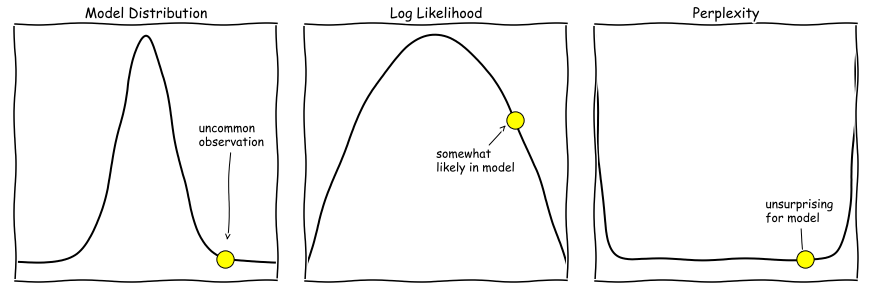

In [200]:
plot_gauss()